**Ontario Gateway Case**


The Ontario Gateway case requires the operations team to evaluate the best insurance plan for the company to choose based on two main criteria. The first is to ensure that the company is able to ensure its losses are less than 37 million. The second is to minimize the total cost of insurance over the 5 years.

This case involves simulating, using binomial distribution, the number of crashes that will occur in their fleet, and calculating the total cost of insurance for each plan. The team will then evaluate the best plan based on the two criteria, utilizing hypothesis testing and simulation.

A sensitivity analysis will also be conducted to determine the impact of the probability of a crash on the total cost of insurance and the initial evaluation result.

In [1]:
#Import all necessary libraries
import pandas as pd
import numpy as np
from scipy.stats import ttest_1samp
import matplotlib.pyplot as plt


**Include all the key information from the case to simulate the number of crashes each year**

In [2]:
# Replacement cost of aircraft
crash_cost_b2 = 56.4*1000000  # boeing 757-200
crash_cost_a2 = 78.9*1000000 # airbus a340-200
crash_cost_a3 = 88.5*1000000 # airbus a340-300

# Simulation parameters
#Fleet size
n_b2 = 47 # boeing 757-200
n_a2 = 15 # airbus a340-200
n_a3 = 24 # airbus a340-300
n = n_b2 + n_a2 + n_a3

#Flight frequency
ff_b2 = 6*342
ff_a2 = 2.25*342
ff_a3 = 2*342

years = 5  # simulate for 5 years
accident_probability = 1 / 5000000  # probability of crash per flight

fleet_value = n_b2*crash_cost_b2 + n_a2*crash_cost_a2 + n_a3*crash_cost_a3

**Include Insurance Plan Details**

In [3]:

# Insurance Plans
insurance_plans = {
    "RCNC1": {
        "annual_fee": 0.0045*(fleet_value),      
        "coverage_min": 0,
        "coverage_limit": np.inf,
        "deductible":0.1,       #updated below according to total crash cost
        "rebate_clause": 0.2
    },
    "RCNC2": {
        "annual_fee": 0.001*(fleet_value),        #updated below according to total crash cost
        "coverage_min": 0,
        "coverage_limit": np.inf,
        "rebate_clause": 0.2
    },
    "CTC": {
        "annual_fee": 13000000, #only covers 90% of total claim amount, updated below according to total crash cost
        "coverage_min": 0,
        "coverage_limit": 80000000,
        "rebate_clause": 0
    },
    "HIC": {
        "annual_fee": (fleet_value) * 0.00165,  # 0.165% of fleet value 
        "coverage_min": 24000000,
        "coverage_limit": np.inf,
        "rebate_clause": 0.035
    }
}

**Run Simulation**

In [4]:
# Run simulation
np.random.seed(42)
results = []

for _ in range(100000):  # run 1000 simulations for more accurate results
    yearly_data = []
    for year in range(years):
        crashes_b2 = np.random.binomial(ff_b2 * n_b2, accident_probability)
        crashes_a2 = np.random.binomial(ff_a2 * n_a2, accident_probability)
        crashes_a3 = np.random.binomial(ff_a3 * n_a3, accident_probability)
        inci_damages = np.random.uniform(1000000,5000000)
        
        # Calculate total crash costs for the year
        crash_cost_total = (crashes_b2 * crash_cost_b2) + (crashes_a2 * crash_cost_a2) + (crashes_a3 * crash_cost_a3) + inci_damages

        # Update deductible and annual fee for certain plans based on crash cost
        insurance_plans["RCNC1"]["deductible"] = 0.1 * crash_cost_total
        insurance_plans["RCNC2"]["annual_fee"] = 0.001 * fleet_value + min(0.9 * crash_cost_total, 0.01 * fleet_value)
        insurance_plans["CTC"]["annual_fee"] = 13000000 + 0.1*crash_cost_total #only covers 90% of total claim amount


        # Calculate costs under each insurance plan
        for plan_name, plan_details in insurance_plans.items():
            annual_fee = plan_details["annual_fee"]
            coverage_min = plan_details.get("coverage_min", 0)
            coverage_limit = plan_details.get("coverage_limit", np.inf)
            deductible = plan_details.get("deductible", 0)
            rebate_clause = plan_details.get("rebate_clause", 0)
            
            # Determine payout after deductible
            if crash_cost_total < coverage_min:
                payout = 0
            else:
                payout = max(0, min(crash_cost_total - deductible, coverage_limit))
            
            
            # Store yearly data for analysis
            yearly_data.append({
                "Year": year + 1,
                "Plan": plan_name,
                "Crashes B2": crashes_b2,
                "Crashes A2": crashes_a2,
                "Crashes A3": crashes_a3,
                "Incidental Damage Costs": inci_damages,
                "Total Crash Costs": crash_cost_total,
                "Annual Fee": annual_fee,
                "Payout": payout,
                "Total Cost": annual_fee + max(0, crash_cost_total - payout)
            })
    
    results.extend(yearly_data)


print(yearly_data)

[{'Year': 1, 'Plan': 'RCNC1', 'Crashes B2': 0, 'Crashes A2': 0, 'Crashes A3': 0, 'Incidental Damage Costs': 2662383.020464384, 'Total Crash Costs': 2662383.020464384, 'Annual Fee': 26812349.999999996, 'Payout': 2396144.718417946, 'Total Cost': 27078588.302046433}, {'Year': 1, 'Plan': 'RCNC2', 'Crashes B2': 0, 'Crashes A2': 0, 'Crashes A3': 0, 'Incidental Damage Costs': 2662383.020464384, 'Total Crash Costs': 2662383.020464384, 'Annual Fee': 8354444.718417946, 'Payout': 2662383.020464384, 'Total Cost': 8354444.718417946}, {'Year': 1, 'Plan': 'CTC', 'Crashes B2': 0, 'Crashes A2': 0, 'Crashes A3': 0, 'Incidental Damage Costs': 2662383.020464384, 'Total Crash Costs': 2662383.020464384, 'Annual Fee': 13266238.302046439, 'Payout': 2662383.020464384, 'Total Cost': 13266238.302046439}, {'Year': 1, 'Plan': 'HIC', 'Crashes B2': 0, 'Crashes A2': 0, 'Crashes A3': 0, 'Incidental Damage Costs': 2662383.020464384, 'Total Crash Costs': 2662383.020464384, 'Annual Fee': 9831195.0, 'Payout': 0, 'Total Co

In [5]:
# Convert to DataFrame for analysis
df_results = pd.DataFrame(results)
print(df_results.head(10))

   Year   Plan  Crashes B2  Crashes A2  Crashes A3  Incidental Damage Costs  \
0     1  RCNC1           0           0           0             3.394634e+06   
1     1  RCNC2           0           0           0             3.394634e+06   
2     1    CTC           0           0           0             3.394634e+06   
3     1    HIC           0           0           0             3.394634e+06   
4     2  RCNC1           0           0           0             4.464705e+06   
5     2  RCNC2           0           0           0             4.464705e+06   
6     2    CTC           0           0           0             4.464705e+06   
7     2    HIC           0           0           0             4.464705e+06   
8     3  RCNC1           0           0           0             4.879639e+06   
9     3  RCNC2           0           0           0             4.879639e+06   

   Total Crash Costs    Annual Fee        Payout    Total Cost  
0       3.394634e+06  2.681235e+07  3.055171e+06  2.715181e+07  


**We will now evaluate each of the plans individually. The two criteria that we will focus on are:**
1.  Ensuring the total cost in the first year does not exceed USD 37,000,000 to ensure that the company has adequate cashflow and does not go bankrupt. In order to do this, we will calculate the sample average of total cost of each plan in the first year and compare it to the USD 37,000,000 threshold, look at the proportion of samples with a total cost > USD 37,000,000, and conduct a hypothesis test to determine if the average total cost of each plan in the first year is significantly different from USD 37,000,000, and calculate the probability that the total cost in the first year will exceed USD 37,000,000.
2. We determine the average total cost, inclusive of any rebates, and standard deviation of the plan over the five years based on the sample simulated data. 

The aim is to pick a plan with the lowest total cost, ensuring that the company has adequate cashflow and does not go bankrupt.

**RCNC 1 Plan**

mean average cost for year 1: $27,267,051 USD and standard deviation: $1,011,725 USD
Proportion of the sample in year 1 with total cost greater than 37 million: 0.00028
Null hypothesis: The mean total cost for year 1 is >= 37 million
Alternative hypothesis: The mean total cost for year 1 < 37 million
t-statistic: -3042.1599931792052, one-tailed p-value: 0.0
The mean total cost for year 1 is less than 37 million.


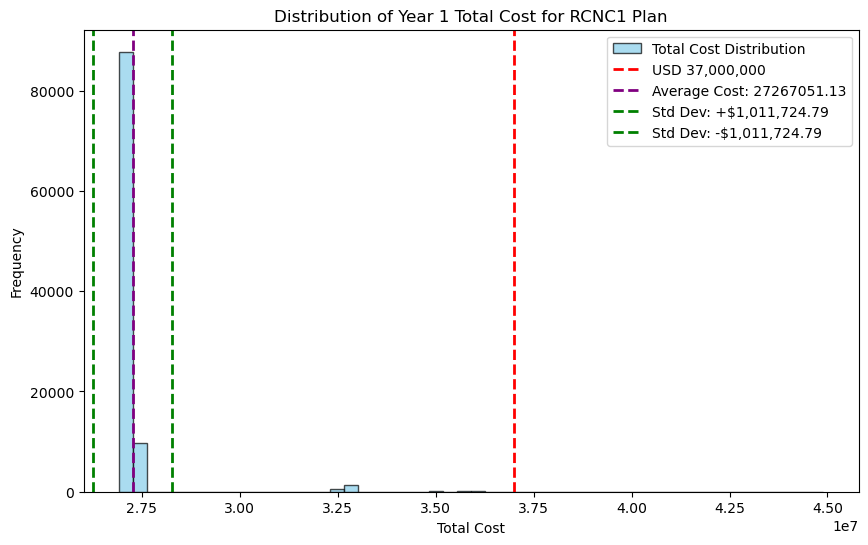

Total cost over 5 years for RCNC1 plan: $22,730,203 USD


In [6]:
#Retrieve the results for RCNC1 plan
RCNC1_results = df_results[df_results['Plan'] == 'RCNC1']


#Criteria 1 - ensure that the total cost in year 1 is less than 37 million

#Find the sample mean and standard deviation for Y1 total cost
RCNC1_year_1_avg_cost = RCNC1_results[RCNC1_results['Year'] == 1]['Total Cost'].mean()
RCNC1_year_1_std_cost = RCNC1_results[RCNC1_results['Year'] == 1]['Total Cost'].std()
print(f"mean average cost for year 1: ${RCNC1_year_1_avg_cost:,.0f} USD and standard deviation: ${RCNC1_year_1_std_cost:,.0f} USD")

#Find the proportion of the sample in year 1 with total cost greater than 37 million
RCNC1_year_prob37 = (RCNC1_results[(RCNC1_results['Year'] == 1) & (RCNC1_results['Total Cost'] > 37000000)]).shape[0]
print(f"Proportion of the sample in year 1 with total cost greater than 37 million: {RCNC1_year_prob37/len(RCNC1_results[RCNC1_results['Year'] == 1])}")

#Hypothesis test for the mean total cost for year 1

print(f"Null hypothesis: The mean total cost for year 1 is >= 37 million")
print(f"Alternative hypothesis: The mean total cost for year 1 < 37 million")

# Perform the one-sample t-test
t_stat_r1, p_value_two_tailed = ttest_1samp(RCNC1_results[RCNC1_results['Year'] == 1]['Total Cost'], 37000000)

# Convert to one-tailed p-value
p_value_one_tailed_rcnc1 = p_value_two_tailed / 2

print(f"t-statistic: {t_stat_r1}, one-tailed p-value: {p_value_one_tailed_rcnc1}")

# Check if we can reject the null hypothesis
if p_value_one_tailed_rcnc1 < 0.05 and t_stat_r1 < 0:
    print("The mean total cost for year 1 is less than 37 million.")
else:
    print("The mean total cost for year 1 is greater than or equal to 37 million.")


# Plot the distribution of year 1 total cost for RCNC1 plan
plt.figure(figsize=(10, 6))
plt.hist(RCNC1_results[RCNC1_results['Year'] == 1]['Total Cost'], bins=50, edgecolor='k', alpha=0.7, color='skyblue', label='Total Cost Distribution')

# Plot reference line at 37,000,000
plt.axvline(37000000, color='red', linestyle='dashed', linewidth=2, label='USD 37,000,000')

# Plot Year 1 average cost line
plt.axvline(RCNC1_year_1_avg_cost, color='purple', linestyle='--', linewidth=2, label=f'Average Cost: {RCNC1_year_1_avg_cost:.2f}')

# Plot Year 1 standard deviation lines
plt.axvline(RCNC1_year_1_avg_cost + RCNC1_year_1_std_cost, color='green', linestyle='--', linewidth=2, label=f'Std Dev: +${RCNC1_year_1_std_cost:,.2f}')
plt.axvline(RCNC1_year_1_avg_cost - RCNC1_year_1_std_cost, color='green', linestyle='--', linewidth=2, label=f'Std Dev: -${RCNC1_year_1_std_cost:,.2f}')
plt.title('Distribution of Year 1 Total Cost for RCNC1 Plan')
plt.xlabel('Total Cost')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#Criteria 2 - total cost over 5 years

rebate_amount_RCNC1 = 0.2*(RCNC1_results['Annual Fee'].mean() - RCNC1_results['Payout'].mean())
RCNC1_total_cost_5y = RCNC1_results['Total Cost'].mean() - rebate_amount_RCNC1
print(f"Total cost over 5 years for RCNC1 plan: ${RCNC1_total_cost_5y:,.0f} USD")


**RCNC 2 Plan**

Mean average cost for year 1: $9,926,543 USD and standard deviation: $8,117,806 USD
Proportion of the sample in year 1 with total cost greater than 37 million: 0.0243
Null hypothesis: The mean total cost for year 1 is >= 37 million
Alternative hypothesis: The mean total cost for year 1 < 37 million
t-statistic: -1054.6418788338049, one-tailed p-value: 0.0
The mean total cost for year 1 is less than 37 million.


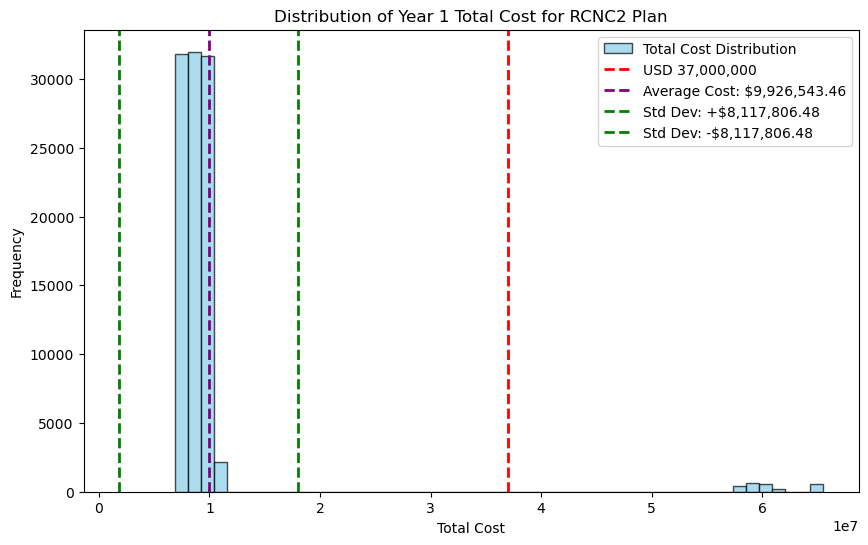

Total cost over 5 years for RCNC2 plan: $9,951,444 USD


In [7]:
# Retrieve the results for RCNC2 plan
RCNC2_results = df_results[df_results['Plan'] == 'RCNC2']

# Criteria 1 - Ensure that the total cost in year 1 is less than 37 million

# Calculate the sample mean and standard deviation for Year 1 total cost
RCNC2_year_1_avg_cost = RCNC2_results[RCNC2_results['Year'] == 1]['Total Cost'].mean()
RCNC2_year_1_std_cost = RCNC2_results[RCNC2_results['Year'] == 1]['Total Cost'].std()

# Print the mean and standard deviation in a formatted manner
print(f"Mean average cost for year 1: ${RCNC2_year_1_avg_cost:,.0f} USD and standard deviation: ${RCNC2_year_1_std_cost:,.0f} USD")

# Calculate the proportion of the sample in year 1 with total cost greater than 37 million
RCNC2_year_prob37 = (RCNC2_results[(RCNC2_results['Year'] == 1) & (RCNC2_results['Total Cost'] > 37000000)]).shape[0]
proportion_greater_than_37M = RCNC2_year_prob37 / len(RCNC2_results[RCNC2_results['Year'] == 1])
print(f"Proportion of the sample in year 1 with total cost greater than 37 million: {proportion_greater_than_37M}")

# Hypothesis test for the mean total cost for year 1
print("Null hypothesis: The mean total cost for year 1 is >= 37 million")
print("Alternative hypothesis: The mean total cost for year 1 < 37 million")

# Perform the one-sample t-test
t_stat_r2, p_value_two_tailed = ttest_1samp(RCNC2_results[RCNC2_results['Year'] == 1]['Total Cost'], 37000000)

# Convert to one-tailed p-value
p_value_one_tailed_rcnc2 = p_value_two_tailed / 2

# Display the t-statistic and one-tailed p-value
print(f"t-statistic: {t_stat_r2}, one-tailed p-value: {p_value_one_tailed_rcnc2}")

# Check if we can reject the null hypothesis
if p_value_one_tailed_rcnc2 < 0.05 and t_stat_r2 < 0:
    print("The mean total cost for year 1 is less than 37 million.")
else:
    print("The mean total cost for year 1 is greater than or equal to 37 million.")

# Plot the distribution of year 1 total cost for RCNC2 plan
plt.figure(figsize=(10, 6))
plt.hist(RCNC2_results[RCNC2_results['Year'] == 1]['Total Cost'], bins=50, edgecolor='k', alpha=0.7, color='skyblue', label='Total Cost Distribution')

# Plot reference line at 37,000,000
plt.axvline(37000000, color='red', linestyle='dashed', linewidth=2, label='USD 37,000,000')

# Plot Year 1 average cost line
plt.axvline(RCNC2_year_1_avg_cost, color='purple', linestyle='--', linewidth=2, label=f'Average Cost: ${RCNC2_year_1_avg_cost:,.2f}')
# Plot Year 1 standard deviation lines
plt.axvline(RCNC2_year_1_avg_cost + RCNC2_year_1_std_cost, color='green', linestyle='--', linewidth=2, label=f'Std Dev: +${RCNC2_year_1_std_cost:,.2f}')
plt.axvline(RCNC2_year_1_avg_cost - RCNC2_year_1_std_cost, color='green', linestyle='--', linewidth=2, label=f'Std Dev: -${RCNC2_year_1_std_cost:,.2f}')

# Add plot title and labels
plt.title('Distribution of Year 1 Total Cost for RCNC2 Plan')
plt.xlabel('Total Cost')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Criteria 2 - Calculate total cost over 5 years for the RCNC2 plan
RCNC2_total_cost_5y = RCNC2_results['Total Cost'].mean()
print(f"Total cost over 5 years for RCNC2 plan: ${RCNC2_total_cost_5y:,.0f} USD")


**CTC Plan**

Mean average cost for year 1: $13,511,568 USD and standard deviation: $1,853,562 USD
Proportion of the sample in year 1 with total cost greater than 37 million: 0.00028
Null hypothesis: The mean total cost for year 1 is >= 37 million
Alternative hypothesis: The mean total cost for year 1 < 37 million
t-statistic: -4007.2536126429877, one-tailed p-value: 0.0
The mean total cost for year 1 is less than 37 million.


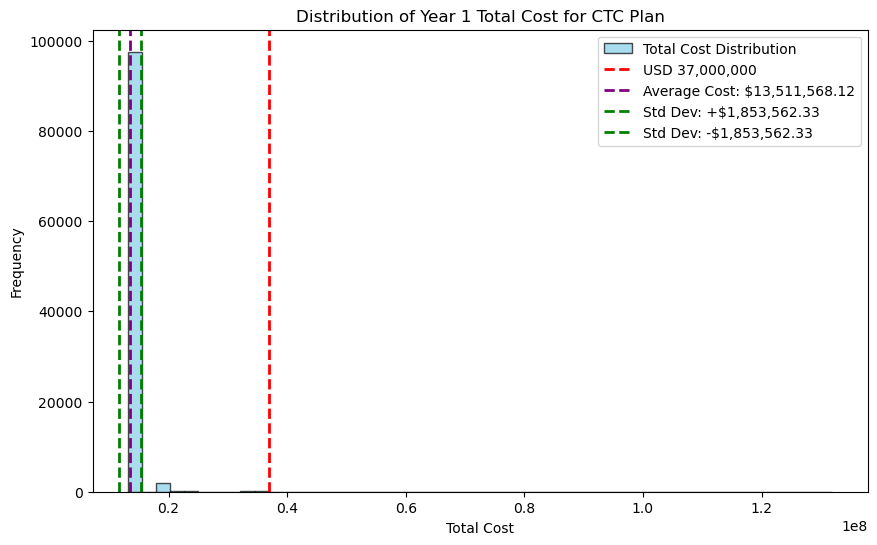

Total cost over 5 years for CTC plan: $13,512,582 USD


In [8]:
# Retrieve the results for CTC plan
CTC_results = df_results[df_results['Plan'] == 'CTC']

# Criteria 1 - Ensure that the total cost in year 1 is less than 37 million

# Calculate the sample mean and standard deviation for Year 1 total cost
CTC_year_1_avg_cost = CTC_results[CTC_results['Year'] == 1]['Total Cost'].mean()
CTC_year_1_std_cost = CTC_results[CTC_results['Year'] == 1]['Total Cost'].std()

# Print the mean and standard deviation in a formatted manner
print(f"Mean average cost for year 1: ${CTC_year_1_avg_cost:,.0f} USD and standard deviation: ${CTC_year_1_std_cost:,.0f} USD")

# Calculate the proportion of the sample in year 1 with total cost greater than 37 million
CTC_year_prob37 = (CTC_results[(CTC_results['Year'] == 1) & (CTC_results['Total Cost'] > 37000000)]).shape[0]
proportion_greater_than_37M = CTC_year_prob37 / len(CTC_results[CTC_results['Year'] == 1])
print(f"Proportion of the sample in year 1 with total cost greater than 37 million: {proportion_greater_than_37M}")

# Hypothesis test for the mean total cost for year 1
print("Null hypothesis: The mean total cost for year 1 is >= 37 million")
print("Alternative hypothesis: The mean total cost for year 1 < 37 million")

# Perform the one-sample t-test
t_stat_c, p_value_two_tailed = ttest_1samp(CTC_results[CTC_results['Year'] == 1]['Total Cost'], 37000000)

# Convert to one-tailed p-value
p_value_one_tailed_ctc = p_value_two_tailed / 2

# Display the t-statistic and one-tailed p-value
print(f"t-statistic: {t_stat_c}, one-tailed p-value: {p_value_one_tailed_ctc}")

# Check if we can reject the null hypothesis
if p_value_one_tailed_ctc < 0.05 and t_stat_c < 0:
    print("The mean total cost for year 1 is less than 37 million.")
else:
    print("The mean total cost for year 1 is greater than or equal to 37 million.")

# Plot the distribution of year 1 total cost for CTC plan
plt.figure(figsize=(10, 6))
plt.hist(CTC_results[CTC_results['Year'] == 1]['Total Cost'], bins=50, edgecolor='k', alpha=0.7, color='skyblue', label='Total Cost Distribution')

# Plot reference line at 37,000,000
plt.axvline(37000000, color='red', linestyle='dashed', linewidth=2, label='USD 37,000,000')

# Plot Year 1 average cost line
plt.axvline(CTC_year_1_avg_cost, color='purple', linestyle='--', linewidth=2, label=f'Average Cost: ${CTC_year_1_avg_cost:,.2f}')

# Plot Year 1 standard deviation lines
plt.axvline(CTC_year_1_avg_cost + CTC_year_1_std_cost, color='green', linestyle='--', linewidth=2, label=f'Std Dev: +${CTC_year_1_std_cost:,.2f}')
plt.axvline(CTC_year_1_avg_cost - CTC_year_1_std_cost, color='green', linestyle='--', linewidth=2, label=f'Std Dev: -${CTC_year_1_std_cost:,.2f}')
# Add plot title and labels
plt.title('Distribution of Year 1 Total Cost for CTC Plan')
plt.xlabel('Total Cost')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Criteria 2 - Calculate total cost over 5 years for the CTC plan
CTC_total_cost_5y = CTC_results['Total Cost'].mean()
print(f"Total cost over 5 years for CTC plan: ${CTC_total_cost_5y:,.0f} USD")

**HIC Plan**

Mean average cost for year 1: $12,757,467 USD and standard deviation: $1,228,453 USD
Proportion of the sample in year 1 with total cost greater than 37 million: 0.0
Null hypothesis: The mean total cost for year 1 is >= 37 million
Alternative hypothesis: The mean total cost for year 1 < 37 million
t-statistic: -6240.503315038436, one-tailed p-value: 0.0
The mean total cost for year 1 is less than 37 million.


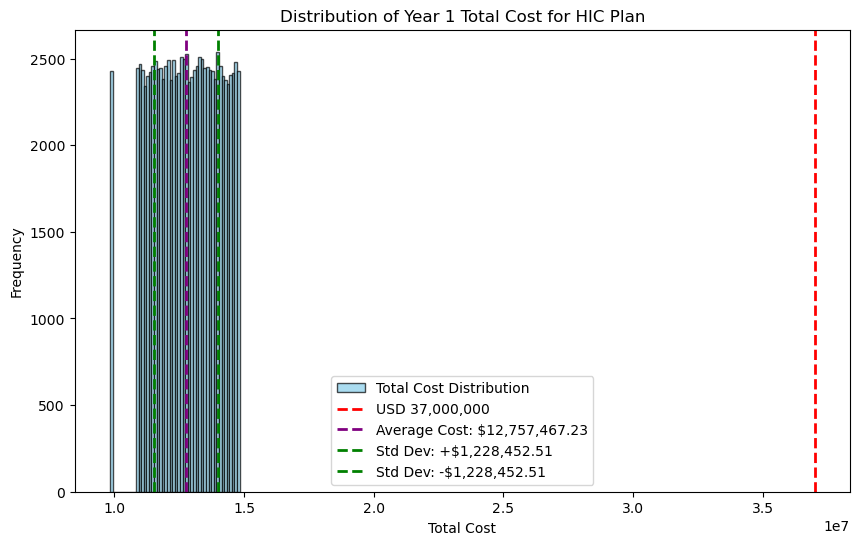

Total cost over 5 years for HIC plan: $12,469,670 USD


In [9]:
# Retrieve the results for HIC plan
HIC_results = df_results[df_results['Plan'] == 'HIC']

# Criteria 1 - Ensure that the total cost in year 1 is less than 37 million

# Calculate the sample mean and standard deviation for Year 1 total cost
HIC_year_1_avg_cost = HIC_results[HIC_results['Year'] == 1]['Total Cost'].mean()
HIC_year_1_std_cost = HIC_results[HIC_results['Year'] == 1]['Total Cost'].std()

# Print the mean and standard deviation in a formatted manner
print(f"Mean average cost for year 1: ${HIC_year_1_avg_cost:,.0f} USD and standard deviation: ${HIC_year_1_std_cost:,.0f} USD")

# Calculate the proportion of the sample in year 1 with total cost greater than 37 million
HIC_year_prob37 = (HIC_results[(HIC_results['Year'] == 1) & (HIC_results['Total Cost'] > 37000000)]).shape[0]
proportion_greater_than_37M = HIC_year_prob37 / len(HIC_results[HIC_results['Year'] == 1])
print(f"Proportion of the sample in year 1 with total cost greater than 37 million: {proportion_greater_than_37M}")

# Hypothesis test for the mean total cost for year 1
print("Null hypothesis: The mean total cost for year 1 is >= 37 million")
print("Alternative hypothesis: The mean total cost for year 1 < 37 million")

# Perform the one-sample t-test
t_stat_h, p_value_two_tailed = ttest_1samp(HIC_results[HIC_results['Year'] == 1]['Total Cost'], 37000000)

# Convert to one-tailed p-value
p_value_one_tailed_hic = p_value_two_tailed / 2

# Display the t-statistic and one-tailed p-value
print(f"t-statistic: {t_stat_h}, one-tailed p-value: {p_value_one_tailed_hic}")

# Check if we can reject the null hypothesis
if p_value_one_tailed_hic < 0.05 and t_stat_h < 0:
    print("The mean total cost for year 1 is less than 37 million.")
else:
    print("The mean total cost for year 1 is greater than or equal to 37 million.")

# Plot the distribution of year 1 total cost for HIC plan
plt.figure(figsize=(10, 6))
plt.hist(HIC_results[HIC_results['Year'] == 1]['Total Cost'], bins=50, edgecolor='k', alpha=0.7, color='skyblue', label='Total Cost Distribution')

# Plot reference line at 37,000,000
plt.axvline(37000000, color='red', linestyle='dashed', linewidth=2, label='USD 37,000,000')

# Plot Year 1 average cost line
plt.axvline(HIC_year_1_avg_cost, color='purple', linestyle='--', linewidth=2, label=f'Average Cost: ${HIC_year_1_avg_cost:,.2f}')

# Plot Year 1 standard deviation lines
plt.axvline(HIC_year_1_avg_cost + HIC_year_1_std_cost, color='green', linestyle='--', linewidth=2, label=f'Std Dev: +${HIC_year_1_std_cost:,.2f}')
plt.axvline(HIC_year_1_avg_cost - HIC_year_1_std_cost, color='green', linestyle='--', linewidth=2, label=f'Std Dev: -${HIC_year_1_std_cost:,.2f}')
# Add plot title and labels
plt.title('Distribution of Year 1 Total Cost for HIC Plan')
plt.xlabel('Total Cost')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Criteria 2 - Calculate total cost over 5 years for the HIC plan
rebate_amount_HIC = 0.035 * (HIC_results['Annual Fee'].mean() - HIC_results['Payout'].mean())
HIC_total_cost_5y = HIC_results['Total Cost'].mean() - rebate_amount_HIC
print(f"Total cost over 5 years for HIC plan: ${HIC_total_cost_5y:,.0f} USD")

In [10]:
#Final comparison

# Create a summary table for criteria 1 metrics for each plan
evaluation_results = {
    "Plan": ["RCNC1", "RCNC2", "CTC", "HIC"],
    "Year 1 Avg Cost": [RCNC1_year_1_avg_cost, RCNC2_year_1_avg_cost, CTC_year_1_avg_cost, HIC_year_1_avg_cost],
    "Year 1 Std Dev": [RCNC1_year_1_std_cost, RCNC2_year_1_std_cost, CTC_year_1_std_cost, HIC_year_1_std_cost],
    "Proportion > 37M": [
        RCNC1_year_prob37 / len(RCNC1_results[RCNC1_results['Year'] == 1]),
        RCNC2_year_prob37 / len(RCNC2_results[RCNC2_results['Year'] == 1]),
        CTC_year_prob37 / len(CTC_results[CTC_results['Year'] == 1]),
        HIC_year_prob37 / len(HIC_results[HIC_results['Year'] == 1])
    ],
    "Hypothesis Test (p-value)": [
        p_value_one_tailed_rcnc1,
        p_value_one_tailed_rcnc2,
        p_value_one_tailed_ctc,
        p_value_one_tailed_hic 
    ],
    "Hypothesis Test (t-stat)": [
        t_stat_r1,
        t_stat_r2,
        t_stat_c,
        t_stat_h,
    ],
    "Total Cost Over 5 Years": [RCNC1_total_cost_5y, RCNC2_total_cost_5y, CTC_total_cost_5y, HIC_total_cost_5y]
}

Evaluation_df = pd.DataFrame(evaluation_results)

Evaluation_df

,Plan,Year 1 Avg Cost,Year 1 Std Dev,Proportion > 37M,Hypothesis Test (p-value),Hypothesis Test (t-stat),Total Cost Over 5 Years
0,RCNC1,2.726705e+07,1.011725e+06,0.00028,0.0,-3042.159993,2.273020e+07
1,RCNC2,9.926543e+06,8.117806e+06,0.02430,0.0,-1054.641879,9.951444e+06
2,CTC,1.351157e+07,1.853562e+06,0.00028,0.0,-4007.253613,1.351258e+07
3,HIC,1.275747e+07,1.228453e+06,0.00000,0.0,-6240.503315,1.246967e+07


Based on the evaluation of the plans, RCNC2 has the lowest total cost over the 5 years and the average total cost in year 1 does not exceed USD 37,000,000 but also has the highest probability/risk (1.8%) of a potential bankruptcy in the first Year. On the other hand, HIC has 0 probability of exceeding USD 37,000,000 in the first year and has the second lowest total cost over the 5 years (11% greater/ ~ 10 M greater than RCNC 2, which is only slightly greater than the standard deviation of RCNC 2). Therefore, in order to mitigate the risk of bankruptcy in the first year, we recommend the HIC plan.

**Sensitivity Analysis**

Based on the inference that the aircrafts of Ontario Gateway are 25% less likely to crash than the industry average, due to the variety of their fleet, we evaluate the plan selection.

[{'Year': 1, 'Plan': 'RCNC1', 'Crashes B2': 0, 'Crashes A2': 0, 'Crashes A3': 0, 'Incidental Damage Costs': 2662383.020464384, 'Total Crash Costs': 2662383.020464384, 'Annual Fee': 26812349.999999996, 'Payout': 2396144.718417946, 'Total Cost': 27078588.302046433}, {'Year': 1, 'Plan': 'RCNC2', 'Crashes B2': 0, 'Crashes A2': 0, 'Crashes A3': 0, 'Incidental Damage Costs': 2662383.020464384, 'Total Crash Costs': 2662383.020464384, 'Annual Fee': 8354444.718417946, 'Payout': 2662383.020464384, 'Total Cost': 8354444.718417946}, {'Year': 1, 'Plan': 'CTC', 'Crashes B2': 0, 'Crashes A2': 0, 'Crashes A3': 0, 'Incidental Damage Costs': 2662383.020464384, 'Total Crash Costs': 2662383.020464384, 'Annual Fee': 13266238.302046439, 'Payout': 2662383.020464384, 'Total Cost': 13266238.302046439}, {'Year': 1, 'Plan': 'HIC', 'Crashes B2': 0, 'Crashes A2': 0, 'Crashes A3': 0, 'Incidental Damage Costs': 2662383.020464384, 'Total Crash Costs': 2662383.020464384, 'Annual Fee': 9831195.0, 'Payout': 0, 'Total Co

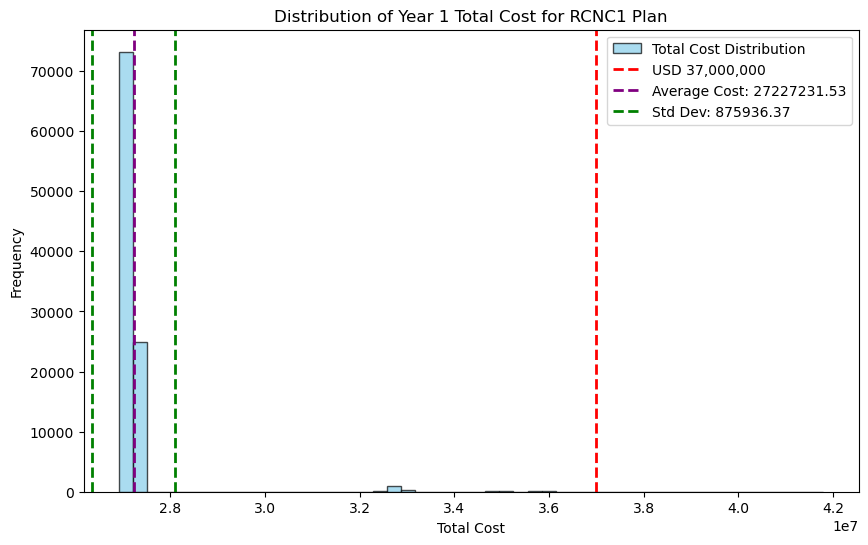

Total cost over 5 years for RCNC1 plan: $22,619,308 USD
The mean total cost for year 1 is less than 37 million.


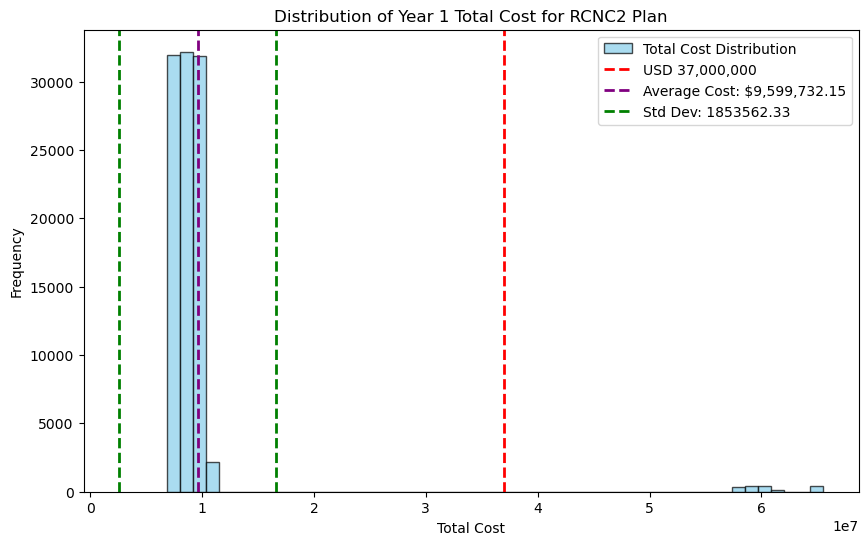

Total cost over 5 years for RCNC2 plan: $9,627,463 USD
The mean total cost for year 1 is less than 37 million.


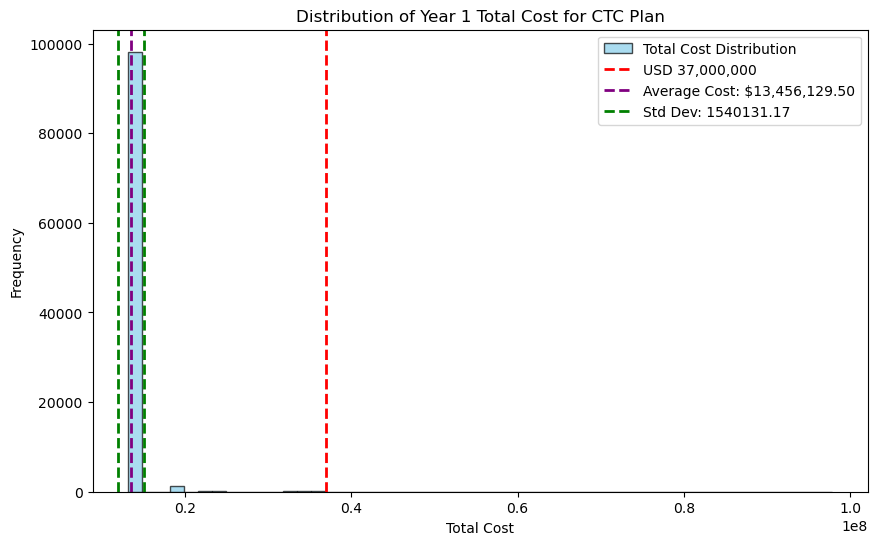

Total cost over 5 years for CTC plan: $13,456,714 USD
The mean total cost for year 1 is less than 37 million.


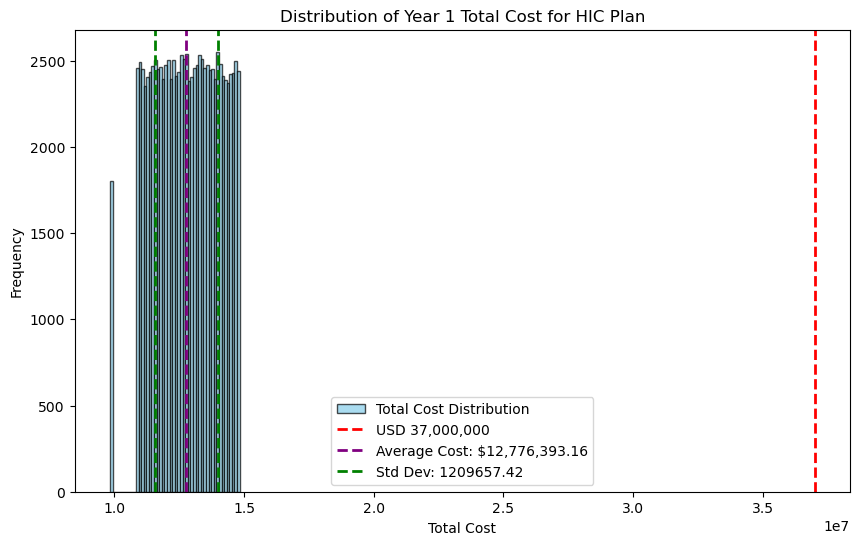

Total cost over 5 years for HIC plan: $12,473,927 USD


,Plan,Year 1 Avg Cost,Year 1 Std Dev,Proportion > 37M,Hypothesis Test (p-value),Hypothesis Test (t-stat),Total Cost Over 5 Years
0,RCNC1,2.722723e+07,8.759364e+05,0.00016,0.0,-3528.133815,2.261931e+07
1,RCNC2,9.599732e+06,7.038181e+06,0.01803,0.0,-1231.103023,9.627463e+06
2,CTC,1.345613e+07,1.540131e+06,0.00016,0.0,-4834.150323,1.345671e+07
3,HIC,1.277639e+07,1.209657e+06,0.00000,0.0,-6332.517729,1.247393e+07


In [11]:
accident_probability_new = 3 / (4*5000000) #25% reduction in accident probability

# Run simulation
np.random.seed(42)
results = []

for _ in range(100000):  # run 100000 simulations for more accurate results
    yearly_data = []
    for year in range(years):
        crashes_b2 = np.random.binomial(ff_b2 * n_b2, accident_probability_new)
        crashes_a2 = np.random.binomial(ff_a2 * n_a2, accident_probability_new)
        crashes_a3 = np.random.binomial(ff_a3 * n_a3, accident_probability_new)
        inci_damages = np.random.uniform(1000000,5000000)
        
        # Calculate total crash costs for the year
        crash_cost_total = (crashes_b2 * crash_cost_b2) + (crashes_a2 * crash_cost_a2) + (crashes_a3 * crash_cost_a3) + inci_damages

        # Update deductible and annual fee for certain plans based on crash cost
        insurance_plans["RCNC1"]["deductible"] = 0.1 * crash_cost_total
        insurance_plans["RCNC2"]["annual_fee"] = 0.001 * fleet_value + min(0.9 * crash_cost_total, 0.01 * fleet_value)
        insurance_plans["CTC"]["annual_fee"] = 13000000 + 0.1*crash_cost_total #only covers 90% of total claim amount


        # Calculate costs under each insurance plan
        for plan_name, plan_details in insurance_plans.items():
            annual_fee = plan_details["annual_fee"]
            coverage_min = plan_details.get("coverage_min", 0)
            coverage_limit = plan_details.get("coverage_limit", np.inf)
            deductible = plan_details.get("deductible", 0)
            rebate_clause = plan_details.get("rebate_clause", 0)
            
            # Determine payout after deductible
            if crash_cost_total < coverage_min:
                payout = 0
            else:
                payout = max(0, min(crash_cost_total - deductible, coverage_limit))
            
            
            # Store yearly data for analysis
            yearly_data.append({
                "Year": year + 1,
                "Plan": plan_name,
                "Crashes B2": crashes_b2,
                "Crashes A2": crashes_a2,
                "Crashes A3": crashes_a3,
                "Incidental Damage Costs": inci_damages,
                "Total Crash Costs": crash_cost_total,
                "Annual Fee": annual_fee,
                "Payout": payout,
                "Total Cost": annual_fee + max(0, crash_cost_total - payout)
            })
    
    results.extend(yearly_data)


print(yearly_data)

# Convert to DataFrame for analysis
df_results = pd.DataFrame(results)
print(df_results.head(10))


#Retrieve the results for RCNC1 plan
RCNC1_results = df_results[df_results['Plan'] == 'RCNC1']


#Criteria 1 - ensure that the total cost in year 1 is less than 37 million

#Find the sample mean and standard deviation for Y1 total cost
RCNC1_year_1_avg_cost = RCNC1_results[RCNC1_results['Year'] == 1]['Total Cost'].mean()
RCNC1_year_1_std_cost = RCNC1_results[RCNC1_results['Year'] == 1]['Total Cost'].std()

#Find the proportion of the sample in year 1 with total cost greater than 37 million
RCNC1_year_prob37 = (RCNC1_results[(RCNC1_results['Year'] == 1) & (RCNC1_results['Total Cost'] > 37000000)]).shape[0]

# Perform the one-sample t-test
t_stat_r1, p_value_two_tailed = ttest_1samp(RCNC1_results[RCNC1_results['Year'] == 1]['Total Cost'], 37000000)

# Convert to one-tailed p-value
p_value_one_tailed_rcnc1 = p_value_two_tailed / 2

# Check if we can reject the null hypothesis
if p_value_one_tailed_rcnc1 < 0.05 and t_stat_r1 < 0:
    print("The mean total cost for year 1 is less than 37 million.")
else:
    print("The mean total cost for year 1 is greater than or equal to 37 million.")


# Plot the distribution of year 1 total cost for RCNC1 plan
plt.figure(figsize=(10, 6))
plt.hist(RCNC1_results[RCNC1_results['Year'] == 1]['Total Cost'], bins=50, edgecolor='k', alpha=0.7, color='skyblue', label='Total Cost Distribution')
plt.axvline(37000000, color='red', linestyle='dashed', linewidth=2, label='USD 37,000,000')
plt.axvline(RCNC1_year_1_avg_cost, color='purple', linestyle='--', linewidth=2, label=f'Average Cost: {RCNC1_year_1_avg_cost:.2f}')
plt.axvline(RCNC1_year_1_avg_cost + RCNC1_year_1_std_cost, color='green', linestyle='--', linewidth=2, label=f'Std Dev: {RCNC1_year_1_std_cost:.2f}')
plt.axvline(RCNC1_year_1_avg_cost - RCNC1_year_1_std_cost, color='green', linestyle='--', linewidth=2)

plt.title('Distribution of Year 1 Total Cost for RCNC1 Plan')
plt.xlabel('Total Cost')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#Criteria 2 - total cost over 5 years

rebate_amount_RCNC1 = 0.2*(RCNC1_results['Annual Fee'].mean() - RCNC1_results['Payout'].mean())
RCNC1_total_cost_5y = RCNC1_results['Total Cost'].mean() - rebate_amount_RCNC1
print(f"Total cost over 5 years for RCNC1 plan: ${RCNC1_total_cost_5y:,.0f} USD")

# Retrieve the results for RCNC2 plan
RCNC2_results = df_results[df_results['Plan'] == 'RCNC2']

# Criteria 1 - Ensure that the total cost in year 1 is less than 37 million

# Calculate the sample mean and standard deviation for Year 1 total cost
RCNC2_year_1_avg_cost = RCNC2_results[RCNC2_results['Year'] == 1]['Total Cost'].mean()
RCNC2_year_1_std_cost = RCNC2_results[RCNC2_results['Year'] == 1]['Total Cost'].std()

# Calculate the proportion of the sample in year 1 with total cost greater than 37 million
RCNC2_year_prob37 = (RCNC2_results[(RCNC2_results['Year'] == 1) & (RCNC2_results['Total Cost'] > 37000000)]).shape[0]
proportion_greater_than_37M = RCNC2_year_prob37 / len(RCNC2_results[RCNC2_results['Year'] == 1])

# Perform the one-sample t-test
t_stat_r2, p_value_two_tailed = ttest_1samp(RCNC2_results[RCNC2_results['Year'] == 1]['Total Cost'], 37000000)

# Convert to one-tailed p-value
p_value_one_tailed_rcnc2 = p_value_two_tailed / 2

# Check if we can reject the null hypothesis
if p_value_one_tailed_rcnc2 < 0.05 and t_stat_r2 < 0:
    print("The mean total cost for year 1 is less than 37 million.")
else:
    print("The mean total cost for year 1 is greater than or equal to 37 million.")

# Plot the distribution of year 1 total cost for RCNC2 plan
plt.figure(figsize=(10, 6))
plt.hist(RCNC2_results[RCNC2_results['Year'] == 1]['Total Cost'], bins=50, edgecolor='k', alpha=0.7, color='skyblue', label='Total Cost Distribution')

plt.axvline(37000000, color='red', linestyle='dashed', linewidth=2, label='USD 37,000,000')
plt.axvline(RCNC2_year_1_avg_cost, color='purple', linestyle='--', linewidth=2, label=f'Average Cost: ${RCNC2_year_1_avg_cost:,.2f}')
plt.axvline(RCNC2_year_1_avg_cost + RCNC2_year_1_std_cost, color='green', linestyle='--', linewidth=2, label=f'Std Dev: {CTC_year_1_std_cost:.2f}')
plt.axvline(RCNC2_year_1_avg_cost - RCNC2_year_1_std_cost, color='green', linestyle='--', linewidth=2)

plt.title('Distribution of Year 1 Total Cost for RCNC2 Plan')
plt.xlabel('Total Cost')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Criteria 2 - Calculate total cost over 5 years for the RCNC2 plan
RCNC2_total_cost_5y = RCNC2_results['Total Cost'].mean()
print(f"Total cost over 5 years for RCNC2 plan: ${RCNC2_total_cost_5y:,.0f} USD")

# Retrieve the results for CTC plan
CTC_results = df_results[df_results['Plan'] == 'CTC']

# Criteria 1 - Ensure that the total cost in year 1 is less than 37 million

# Calculate the sample mean and standard deviation for Year 1 total cost
CTC_year_1_avg_cost = CTC_results[CTC_results['Year'] == 1]['Total Cost'].mean()
CTC_year_1_std_cost = CTC_results[CTC_results['Year'] == 1]['Total Cost'].std()

# Calculate the proportion of the sample in year 1 with total cost greater than 37 million
CTC_year_prob37 = (CTC_results[(CTC_results['Year'] == 1) & (CTC_results['Total Cost'] > 37000000)]).shape[0]
proportion_greater_than_37M = CTC_year_prob37 / len(CTC_results[CTC_results['Year'] == 1])

# Perform the one-sample t-test
t_stat_c, p_value_two_tailed = ttest_1samp(CTC_results[CTC_results['Year'] == 1]['Total Cost'], 37000000)

# Convert to one-tailed p-value
p_value_one_tailed_ctc = p_value_two_tailed / 2

# Check if we can reject the null hypothesis
if p_value_one_tailed_ctc < 0.05 and t_stat_c < 0:
    print("The mean total cost for year 1 is less than 37 million.")
else:
    print("The mean total cost for year 1 is greater than or equal to 37 million.")

# Plot the distribution of year 1 total cost for CTC plan
plt.figure(figsize=(10, 6))
plt.hist(CTC_results[CTC_results['Year'] == 1]['Total Cost'], bins=50, edgecolor='k', alpha=0.7, color='skyblue', label='Total Cost Distribution')

plt.axvline(37000000, color='red', linestyle='dashed', linewidth=2, label='USD 37,000,000')


plt.axvline(CTC_year_1_avg_cost, color='purple', linestyle='--', linewidth=2, label=f'Average Cost: ${CTC_year_1_avg_cost:,.2f}')
plt.axvline(CTC_year_1_avg_cost + CTC_year_1_std_cost, color='green', linestyle='--', linewidth=2, label=f'Std Dev: {CTC_year_1_std_cost:.2f}')
plt.axvline(CTC_year_1_avg_cost - CTC_year_1_std_cost, color='green', linestyle='--', linewidth=2)
plt.title('Distribution of Year 1 Total Cost for CTC Plan')
plt.xlabel('Total Cost')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Criteria 2 - Calculate total cost over 5 years for the CTC plan
CTC_total_cost_5y = CTC_results['Total Cost'].mean()
print(f"Total cost over 5 years for CTC plan: ${CTC_total_cost_5y:,.0f} USD")

# Retrieve the results for HIC plan
HIC_results = df_results[df_results['Plan'] == 'HIC']

# Criteria 1 - Ensure that the total cost in year 1 is less than 37 million

# Calculate the sample mean and standard deviation for Year 1 total cost
HIC_year_1_avg_cost = HIC_results[HIC_results['Year'] == 1]['Total Cost'].mean()
HIC_year_1_std_cost = HIC_results[HIC_results['Year'] == 1]['Total Cost'].std()
# Calculate the proportion of the sample in year 1 with total cost greater than 37 million
HIC_year_prob37 = (HIC_results[(HIC_results['Year'] == 1) & (HIC_results['Total Cost'] > 37000000)]).shape[0]
proportion_greater_than_37M = HIC_year_prob37 / len(HIC_results[HIC_results['Year'] == 1])

# Perform the one-sample t-test
t_stat_h, p_value_two_tailed = ttest_1samp(HIC_results[HIC_results['Year'] == 1]['Total Cost'], 37000000)

# Convert to one-tailed p-value
p_value_one_tailed_hic = p_value_two_tailed / 2

# Check if we can reject the null hypothesis
if p_value_one_tailed_hic < 0.05 and t_stat_h < 0:
    print("The mean total cost for year 1 is less than 37 million.")
else:
    print("The mean total cost for year 1 is greater than or equal to 37 million.")

# Plot the distribution of year 1 total cost for HIC plan
plt.figure(figsize=(10, 6))
plt.hist(HIC_results[HIC_results['Year'] == 1]['Total Cost'], bins=50, edgecolor='k', alpha=0.7, color='skyblue', label='Total Cost Distribution')

plt.axvline(37000000, color='red', linestyle='dashed', linewidth=2, label='USD 37,000,000')

plt.axvline(HIC_year_1_avg_cost, color='purple', linestyle='--', linewidth=2, label=f'Average Cost: ${HIC_year_1_avg_cost:,.2f}')
plt.axvline(HIC_year_1_avg_cost + HIC_year_1_std_cost, color='green', linestyle='--', linewidth=2, label=f'Std Dev: {HIC_year_1_std_cost:.2f}')
plt.axvline(HIC_year_1_avg_cost - HIC_year_1_std_cost, color='green', linestyle='--', linewidth=2)
plt.title('Distribution of Year 1 Total Cost for HIC Plan')
plt.xlabel('Total Cost')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Criteria 2 - Calculate total cost over 5 years for the HIC plan
rebate_amount_HIC = 0.035 * (HIC_results['Annual Fee'].mean() - HIC_results['Payout'].mean())
HIC_total_cost_5y = HIC_results['Total Cost'].mean() - rebate_amount_HIC
print(f"Total cost over 5 years for HIC plan: ${HIC_total_cost_5y:,.0f} USD")

#Final comparison

# Create a summary table for criteria 1 metrics for each plan
evaluation_results_new = {
    "Plan": ["RCNC1", "RCNC2", "CTC", "HIC"],
    "Year 1 Avg Cost": [RCNC1_year_1_avg_cost, RCNC2_year_1_avg_cost, CTC_year_1_avg_cost, HIC_year_1_avg_cost],
    "Year 1 Std Dev": [RCNC1_year_1_std_cost, RCNC2_year_1_std_cost, CTC_year_1_std_cost, HIC_year_1_std_cost],
    "Proportion > 37M": [
        RCNC1_year_prob37 / len(RCNC1_results[RCNC1_results['Year'] == 1]),
        RCNC2_year_prob37 / len(RCNC2_results[RCNC2_results['Year'] == 1]),
        CTC_year_prob37 / len(CTC_results[CTC_results['Year'] == 1]),
        HIC_year_prob37 / len(HIC_results[HIC_results['Year'] == 1])
    ],
    "Hypothesis Test (p-value)": [
        p_value_one_tailed_rcnc1,
        p_value_one_tailed_rcnc2,
        p_value_one_tailed_ctc,
        p_value_one_tailed_hic 
    ],
     "Hypothesis Test (t-stat)": [
        t_stat_r1,
        t_stat_r2,
        t_stat_c,
        t_stat_h,
    ],
    "Total Cost Over 5 Years": [RCNC1_total_cost_5y, RCNC2_total_cost_5y, CTC_total_cost_5y, HIC_total_cost_5y]
}

Evaluation_df_new = pd.DataFrame(evaluation_results_new)

Evaluation_df_new



In [15]:

# Calculate the difference in values after changing the probability for year 1 avg cost, proportion > 37 m, t-stat, and total cost over 5 years

# Calculate the differences for each plan
plans = ["RCNC1", "RCNC2", "CTC", "HIC"]
differences = {
    "Plan": [],
    "Diff Year 1 Avg Cost": [],
    "Diff Year 1 Cost Standard Deviation": [],
    "Diff Proportion > 37M": [],
    "Diff t-stat": [],
    "Diff Total Cost Over 5 Years": []
}

for plan in plans:
    index = Evaluation_df[Evaluation_df['Plan'] == plan].index[0]
    diff_year_1_avg_cost = Evaluation_df_new.loc[index, 'Year 1 Avg Cost'] - Evaluation_df.loc[index, 'Year 1 Avg Cost']
    diff_year_1_std_dev = Evaluation_df_new.loc[index, 'Year 1 Std Dev'] - Evaluation_df.loc[index, 'Year 1 Std Dev']
    diff_proportion_37m = Evaluation_df_new.loc[index, 'Proportion > 37M'] - Evaluation_df.loc[index, 'Proportion > 37M']
    diff_t_stat = Evaluation_df_new.loc[index, 'Hypothesis Test (t-stat)'] - Evaluation_df.loc[index, 'Hypothesis Test (t-stat)']
    diff_total_cost_5y = Evaluation_df_new.loc[index, 'Total Cost Over 5 Years'] - Evaluation_df.loc[index, 'Total Cost Over 5 Years']
    
    differences["Plan"].append(plan)
    differences["Diff Year 1 Avg Cost"].append(diff_year_1_avg_cost)
    differences["Diff Year 1 Cost Standard Deviation"].append(diff_year_1_std_dev)
    differences["Diff Proportion > 37M"].append(diff_proportion_37m)
    differences["Diff t-stat"].append(diff_t_stat)
    differences["Diff Total Cost Over 5 Years"].append(diff_total_cost_5y)

# Convert differences to DataFrame for better visualization
df_differences = pd.DataFrame(differences)
print(df_differences[['Plan', 'Diff Year 1 Avg Cost', 'Diff Year 1 Cost Standard Deviation', 'Diff Proportion > 37M', 'Diff t-stat', 'Diff Total Cost Over 5 Years']])

# Calculate percentage differences for each plan
df_differences['% Diff Year 1 Avg Cost'] = (df_differences['Diff Year 1 Avg Cost'] / Evaluation_df['Year 1 Avg Cost']) * 100
df_differences['% Diff Year 1 Std Dev'] = (df_differences['Diff Year 1 Cost Standard Deviation'] / Evaluation_df['Year 1 Std Dev']) * 100
df_differences['% Diff Proportion > 37M'] = df_differences.apply(lambda row: 0 if Evaluation_df.loc[Evaluation_df['Plan'] == row['Plan'], 'Proportion > 37M'].values[0] == 0 else (row['Diff Proportion > 37M'] / Evaluation_df.loc[Evaluation_df['Plan'] == row['Plan'], 'Proportion > 37M'].values[0]) * 100, axis=1)
df_differences['% Diff t-stat'] = (df_differences['Diff t-stat'] / Evaluation_df['Hypothesis Test (t-stat)']) * 100
df_differences['% Diff Total Cost Over 5 Years'] = (df_differences['Diff Total Cost Over 5 Years'] / Evaluation_df['Total Cost Over 5 Years']) * 100

# Create a summary table for the differences in values after changing the probability
summary_table_percentdiff = df_differences[['Plan', '% Diff Year 1 Avg Cost', '% Diff Year 1 Std Dev','% Diff Proportion > 37M', '% Diff t-stat', '% Diff Total Cost Over 5 Years']]
summary_table_percentdiff

    Plan  Diff Year 1 Avg Cost  Diff Year 1 Cost Standard Deviation  \
0  RCNC1         -39819.600000                        -1.357884e+05   
1  RCNC2        -326811.307266                        -1.079626e+06   
2    CTC         -55438.625260                        -3.134312e+05   
3    HIC          18925.930110                        -1.879509e+04   

   Diff Proportion > 37M  Diff t-stat  Diff Total Cost Over 5 Years  
0               -0.00012  -485.973821                -110894.616000  
1               -0.00627  -176.461144                -323980.311281  
2               -0.00012  -826.896710                 -55867.590148  
3                0.00000   -92.014414                   4257.282820  


,Plan,% Diff Year 1 Avg Cost,% Diff Year 1 Std Dev,% Diff Proportion > 37M,% Diff t-stat,% Diff Total Cost Over 5 Years
0,RCNC1,-0.146036,-13.421478,-42.857143,15.974631,-0.487873
1,RCNC2,-3.292297,-13.299477,-25.802469,16.731854,-3.255611
2,CTC,-0.410305,-16.909664,-42.857143,20.634998,-0.413449
3,HIC,0.148352,-1.529981,0.000000,1.474471,0.034141


**Explaining the changes observed:**

Recommendation in this case: HIC is still the best plan to choose as it has the second lowest total cost, even though the cost has increased, over the 5 years and has 0 probability of exceeding USD 37,000,000 in the first year.

In general, the plans, have decreased in terms of total cost, especially the RCNC2 plan's cost, which is highly sensitive to changes in accident probability. A decrease in accident probability leads to fewer crashes, which in turn reduces the total crash costs and the plan's payouts, resulting in a significant decrease in the overall cost of the plan.


The detailed explanation for changes observed in each plan is as follows:

1. **RCNC1 and RCNC2 Plans**:
    - These plans have deductibles and annual fees that are directly influenced by the total crash costs. When the accident probability decreases, the total crash costs decrease, leading to lower payouts and lower total costs.
    -The cost of the RCNC2 plan decreases significantly because it is directly influenced by the total crash costs. Since the plan pays out less due to fewer crashes, the overall cost of the plan decreases significantly.

2. **CTC Plan**:
    - The CTC plan has a fixed annual fee and covers 90% of the total claim amount. With fewer crashes, the total crash costs decrease, leading to lower payouts and lower total costs.

3. **HIC Plan**:
    - The HIC plan has a high deductible and a rebate clause. The high deductible means that the plan pays out less frequently, and the rebate clause provides a rebate based on the difference between the annual fee and the payout. When the accident probability decreases, the total crash costs decrease, but the high deductible means that the plan's payouts are less affected. Additionally, the rebate clause can lead to an increase in the total cost over 5 years if the annual fee remains relatively high compared to the payouts.



